<a href="https://colab.research.google.com/github/mrenchiladas/python-course/blob/main/Redes_neuronales_profundas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes neuronales profundas

> **Rodolfo Ferro** <br>
> Google Dev Expert en ML, 2020.
>
> _Redes:_
> - GitHub - [RodolfoFerro](https://github.com/RodolfoFerro)
> - Twitter - [@FerroRodolfo](https://twitter.com/FerroRodolfo)
> - Instagram - [@rodo_ferro](https://instagram.com/rodo_ferro)

## Contenidos

#### **Sección IV**
1. **Código:** El dataset de modas
2. **Código:** Preparación de datos
3. **Código:** Creación del modelo
4. **Código:** Entrenamiento del modelo
5. **Código:** Evaluación del modelo
6. **Código:** Predicción


## **Sección IV**

### El dataset de modas

Comencemos importando TensorFlow.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0


Los datos de Fashion MNIST están disponibles directamente en la API de conjuntos de datos de `tf.keras`. Los cargas así:

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

Llamar a `load_data` en este objeto nos dará dos conjuntos con los valores de entrenamiento y prueba para los gráficos que contienen las prendas y sus etiquetas.

In [3]:
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


¿Cómo se ven estos valores?

Imprimamos una imagen de entrenamiento y una etiqueta de entrenamiento para ver.

Label: 8
Matrix: [[  0   0   0   0   0   0   0   0   0   1   0   0  18 107 119 103   9   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  99 155 113  61 118 173 117   0   0   3   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0 110 136   0   0   0   0   0 167 159   0   0   2   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   6   0  72 147   0   0   5   0   2   0   0 174 118   0   5   0   0   0   0   0   0]
 [  0   0   0   0   0   1   5   0   0 174   4   0   4   0   0   0   0   0   0 204  44   0   4   0   0   0   0   0]
 [  0   0   0   0   0   0   8   0 125 128   0   9   0   0   0   0   0   2   0 107 152   0   6   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 184   9   0   4   0   0   0   0   0   2   0   0 190   0   0   2   0   0   0   0]
 [  0   0   0   1   0   2   0  73 158   0   0   0   0   1   0   0   0   0   4   0 157  79   0   3   1   0   0   0]
 [  0   0   2   5   1   0   0 157  98   0   2   0   0   1   0  

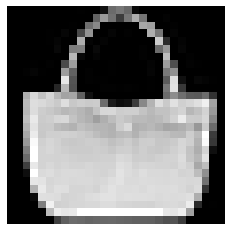

In [6]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)


# Set index of image to be seen
img_index = 100 # 6000 -1

# Plot image
plt.imshow(training_images[img_index], cmap='gray')
plt.axis(False)

print("Label:", training_labels[img_index])
print("Matrix:", training_images[img_index])

### Preparación de los datos

Notarás que todos los valores están entre 0 y 255. Si estamos entrenando una red neuronal, por varias razones es más fácil si transformamos los valores para tratar todos con valores entre 0 y 1. Este proceso se llama **normalización**.

In [7]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Label: 6
Matrix: [[0.         0.         0.         0.         0.         0.         0.         0.         0.00392157 0.00392157 0.         0.         0.47058824 0.51372549 0.35686275 0.57647059 0.11764706
  0.         0.         0.00392157 0.00392157 0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.00392157 0.01176471 0.         0.         0.         0.         0.98431373 0.78039216 0.6745098  0.76470588 0.59607843
  0.         0.         0.         0.         0.01176471 0.00392157 0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.16862745 0.48627451 0.75686275 0.65098039 0.9372549  1.         0.84705882 0.6745098
  0.89411765 0.49411765 0.23921569 0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.        

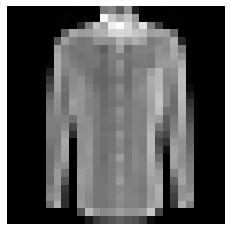

In [8]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)


# Set index of image to be seen
img_index = 3000 # 6000 -1

# Plot image
plt.imshow(training_images[img_index], cmap='gray')
plt.axis(False)

print("Label:", training_labels[img_index])
print("Matrix:", training_images[img_index])

In [9]:
training_images[0].shape

(28, 28)

### Creación del modelo



In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(256, activation=tf.nn.relu), 
    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
    tf.keras.layers.Dense(64, activation=tf.nn.relu), 
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [46]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

### Entrenamiento del modelo

In [47]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [48]:
model.fit(training_images, training_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4814 - accuracy: 0.8276
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3600 - accuracy: 0.8676
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3254 - accuracy: 0.8791
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3043 - accuracy: 0.8873
Epoch 5/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2839 - accuracy: 0.8935
Epoch 6/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2707 - accuracy: 0.8991
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2588 - accuracy: 0.9035
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2472 - accuracy: 0.9061
Epoch 9/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2381 - accuracy: 0.9101
Epoch 10/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.229

### Evaluación del modelo

In [49]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5891 - accuracy: 0.8938


[0.5891492366790771, 0.8938000202178955]

### Predicción


Label: 5
Prediction: 5


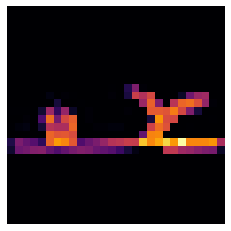

In [20]:
import random

test_index = random.randint(0, 10000 - 1)

plt.imshow(test_images[test_index], cmap='inferno')
plt.axis(False)

print("Label:", test_labels[test_index])
input_image = np.reshape(test_images[test_index], (1, 784))
prediction = model.predict(np.expand_dims(input_image, axis=-1))
print("Prediction:", np.argmax(prediction))

In [21]:
prediction

array([[9.4900628e-13, 3.2982020e-17, 1.5081195e-12, 1.3296705e-15, 7.5851998e-12, 1.0000000e+00, 6.7623201e-14, 5.9276223e-11, 5.4334256e-11, 1.8297800e-13]], dtype=float32)